# Import libraries

# Define path/directory

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

import math

In [ ]:
# Accessing My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create new directory in colab runtime for storing testing images of ASMAT & MADURA
!mkdir /content/before_cropping
!mkdir /content/before_cropping/asmat
!mkdir /content/before_cropping/madura

In [ ]:
# copy ASMAT testing images to colab runtime
!find "/content/drive/MyDrive/asmat/[82] before cropping/" -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) -exec cp '{}' "/content/before_cropping/asmat" \;
!find "/content/drive/MyDrive/asmat/[43] busana only/" -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) -exec cp '{}' "/content/before_cropping/asmat" \;

# copy MADURA testing images to colab runtime
!find "/content/drive/MyDrive/madura/[125] before cropping or removebg/" -type f \( -iname "*.jpg" -o -iname "*.jpeg" -o -iname "*.png" \) -exec cp '{}' "/content/before_cropping/madura" \;

In [ ]:
source_path = '/content/drive/MyDrive/baju_adat'

# source_path_madura = os.path.join(source_path, 'madura')
source_path_madura = '/content/before_cropping/madura'
# source_path_asmat = os.path.join(source_path, 'asmat')
source_path_asmat = '/content/before_cropping/asmat'
source_path_dayak = os.path.join(source_path, 'dayak')
# source_path_minang = os.path.join(source_path, 'minang')
source_path_bali = os.path.join(source_path, 'bali')
# source_path_bugis = os.path.join(source_path, 'bugis')

print(f"There are {len(os.listdir(source_path_madura))} images of Madura.")
print(f"There are {len(os.listdir(source_path_asmat))} images of Asmat.")
print(f"There are {len(os.listdir(source_path_dayak))} images of Dayak.")
#print(f"There are {len(os.listdir(source_path_minang))} images of Minang.")
print(f"There are {len(os.listdir(source_path_bali))} images of Bali.")
#print(f"There are {len(os.listdir(source_path_bugis))} images of Bugis.")

There are 125 images of Madura.
There are 123 images of Asmat.
There are 157 images of Dayak.
There are 223 images of Bali.


In [ ]:
root_dir = '/content/drive/MyDrive/baju_adat_preprocess'

if os.path.exists(root_dir):
      shutil.rmtree(root_dir)

In [ ]:
def create_train_val_dirs(root_path, list_suku):
  for suku in list_suku:
    os.makedirs(os.path.join(root_path, f'training/{suku}'))
    os.makedirs(os.path.join(root_path, f'validation/{suku}'))

In [ ]:
try:
  create_train_val_dirs(root_path=root_dir,
                        #list_suku=['madura','asmat','dayak','minang','bali','bugis'])
                        list_suku=['madura','asmat','dayak','bali'])
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Check the created directories as the result of create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/baju_adat_preprocess/training
/content/drive/MyDrive/baju_adat_preprocess/validation
/content/drive/MyDrive/baju_adat_preprocess/training/madura
/content/drive/MyDrive/baju_adat_preprocess/training/asmat
/content/drive/MyDrive/baju_adat_preprocess/training/dayak
/content/drive/MyDrive/baju_adat_preprocess/training/bali
/content/drive/MyDrive/baju_adat_preprocess/validation/madura
/content/drive/MyDrive/baju_adat_preprocess/validation/asmat
/content/drive/MyDrive/baju_adat_preprocess/validation/dayak
/content/drive/MyDrive/baju_adat_preprocess/validation/bali


# Balancing data

In [ ]:
def sampling_data(SOURCE_DIR, DESTINATION_DIR, NUM_SAMPLE):
  list_file = os.listdir(SOURCE_DIR)
  list_file_notzero = []
  for files in list_file:
    if os.path.getsize(os.path.join(SOURCE_DIR, files)) == 0:
      print(f'{files} is zero so length, so ignoring.')
    else:
      list_file_notzero.extend([files])

  sample_data = random.sample(list_file_notzero, NUM_SAMPLE)

  for files in sample_data:
    copyfile(os.path.join(SOURCE_DIR, files), os.path.join(DESTINATION_DIR, files))

In [ ]:
new_source_path_asmat = '/content/drive/MyDrive/baju_adat_temp/asmat/'
new_source_path_bali = '/content/drive/MyDrive/baju_adat_temp/bali/'
new_source_path_dayak = '/content/drive/MyDrive/baju_adat_temp/dayak/'
new_source_path_madura = '/content/drive/MyDrive/baju_adat_temp/madura/'

In [ ]:
if os.path.exists(new_source_path_asmat):
  shutil.rmtree(new_source_path_asmat)

if os.path.exists(new_source_path_bali):
  shutil.rmtree(new_source_path_bali)

if os.path.exists(new_source_path_dayak):
  shutil.rmtree(new_source_path_dayak)

if os.path.exists(new_source_path_madura):
  shutil.rmtree(new_source_path_madura)

In [ ]:
os.makedirs(new_source_path_asmat)
os.makedirs(new_source_path_bali)
os.makedirs(new_source_path_dayak)
os.makedirs(new_source_path_madura)

In [ ]:
sampling_data(source_path_asmat, new_source_path_asmat, 123)
sampling_data(source_path_bali, new_source_path_bali, 123)
sampling_data(source_path_dayak, new_source_path_dayak, 123)
sampling_data(source_path_madura, new_source_path_madura, 123)

# Split data

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  list_file = os.listdir(SOURCE_DIR)
  list_file_notzero = []
  for files in list_file:
    if os.path.getsize(os.path.join(SOURCE_DIR, files)) == 0:
      print(f'{files} is zero so length, so ignoring.')
    else:
      list_file_notzero.extend([files])

  len_train = int(len(list_file_notzero) * SPLIT_SIZE)
  len_validation = int(len(list_file_notzero) - len_train)

  train_files = random.sample(list_file_notzero, len_train)
  validation_files = random.sample(list_file_notzero, len_validation)

  for files in train_files:
    copyfile(os.path.join(SOURCE_DIR,files), os.path.join(TRAINING_DIR, files))
  for files in validation_files:
    copyfile(os.path.join(SOURCE_DIR, files), os.path.join(VALIDATION_DIR, files))

In [ ]:
MADURA_SOURCE_DIR = new_source_path_madura
ASMAT_SOURCE_DIR = new_source_path_asmat
DAYAK_SOURCE_DIR = new_source_path_dayak
# MINANG_SOURCE_DIR = source_path_minang
BALI_SOURCE_DIR = new_source_path_bali
# BUGIS_SOURCE_DIR = source_path_bugis

TRAINING_DIR = "/content/drive/MyDrive/baju_adat_preprocess/training/"
VALIDATION_DIR = "/content/drive/MyDrive/baju_adat_preprocess/validation/"

TRAINING_MADURA_DIR = os.path.join(TRAINING_DIR, "madura/")
VALIDATION_MADURA_DIR = os.path.join(VALIDATION_DIR, "madura/")

TRAINING_ASMAT_DIR = os.path.join(TRAINING_DIR, "asmat/")
VALIDATION_ASMAT_DIR = os.path.join(VALIDATION_DIR, "asmat/")

TRAINING_DAYAK_DIR = os.path.join(TRAINING_DIR, "dayak/")
VALIDATION_DAYAK_DIR = os.path.join(VALIDATION_DIR, "dayak/")

# TRAINING_MINANG_DIR = os.path.join(TRAINING_DIR, "minang/")
# VALIDATION_MINANG_DIR = os.path.join(VALIDATION_DIR, "minang/")

TRAINING_BALI_DIR = os.path.join(TRAINING_DIR, "bali/")
VALIDATION_BALI_DIR = os.path.join(VALIDATION_DIR, "bali/")

# TRAINING_BUGIS_DIR = os.path.join(TRAINING_DIR, "bugis/")
# VALIDATION_BUGIS_DIR = os.path.join(VALIDATION_DIR, "bugis/")

In [ ]:
if len(os.listdir(TRAINING_MADURA_DIR)) > 0:
  for file in os.scandir(TRAINING_MADURA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ASMAT_DIR)) > 0:
  for file in os.scandir(TRAINING_ASMAT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DAYAK_DIR)) > 0:
  for file in os.scandir(TRAINING_DAYAK_DIR):
    os.remove(file.path)
# if len(os.listdir(TRAINING_MINANG_DIR)) > 0:
#   for file in os.scandir(TRAINING_MINANG_DIR):
#     os.remove(file.path)
if len(os.listdir(TRAINING_BALI_DIR)) > 0:
  for file in os.scandir(TRAINING_BALI_DIR):
    os.remove(file.path)
# if len(os.listdir(TRAINING_BUGIS_DIR)) > 0:
#   for file in os.scandir(TRAINING_BUGIS_DIR):
#     os.remove(file.path)

if len(os.listdir(VALIDATION_MADURA_DIR)) > 0:
  for file in os.scandir(VALIDATION_MADURA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ASMAT_DIR)) > 0:
  for file in os.scandir(VALIDATION_ASMAT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DAYAK_DIR)) > 0:
  for file in os.scandir(VALIDATION_DAYAK_DIR):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_MINANG_DIR)) > 0:
#   for file in os.scandir(VALIDATION_MINANG_DIR):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_BALI_DIR)) > 0:
  for file in os.scandir(VALIDATION_BALI_DIR):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_BUGIS_DIR)) > 0:
#   for file in os.scandir(VALIDATION_BUGIS_DIR):
#     os.remove(file.path)

In [ ]:
train_val_split_size = .5

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(MADURA_SOURCE_DIR, TRAINING_MADURA_DIR, VALIDATION_MADURA_DIR, train_val_split_size) # train val split

split_data(ASMAT_SOURCE_DIR, TRAINING_ASMAT_DIR, VALIDATION_ASMAT_DIR, train_val_split_size) # train val split

split_data(DAYAK_SOURCE_DIR, TRAINING_DAYAK_DIR, VALIDATION_DAYAK_DIR, train_val_split_size) # train val split

# split_data(MINANG_SOURCE_DIR, TRAINING_MINANG_DIR, VALIDATION_MINANG_DIR, train_val_split_size) # train val split

split_data(BALI_SOURCE_DIR, TRAINING_BALI_DIR, VALIDATION_BALI_DIR, train_val_split_size) # train val split

# split_data(BUGIS_SOURCE_DIR, TRAINING_BUGIS_DIR, VALIDATION_BUGIS_DIR, train_val_split_size) # train val split

In [ ]:
print(f"\n\nOriginal Madura's directory has {len(os.listdir(MADURA_SOURCE_DIR))} images")
print(f"Original Asmat's directory has {len(os.listdir(ASMAT_SOURCE_DIR))} images")
print(f"Original Dayak's directory has {len(os.listdir(DAYAK_SOURCE_DIR))} images")
# print(f"Original Minang's directory has {len(os.listdir(MINANG_SOURCE_DIR))} images")
print(f"Original Bali's directory has {len(os.listdir(BALI_SOURCE_DIR))} images")
# print(f"Original Bugis's directory has {len(os.listdir(BUGIS_SOURCE_DIR))} images")
print()
print(f"There are {len(os.listdir(TRAINING_MADURA_DIR))} images of Madura for training")
print(f"There are {len(os.listdir(TRAINING_ASMAT_DIR))} images of Asmat for training")
print(f"There are {len(os.listdir(TRAINING_DAYAK_DIR))} images of Dayak for training")
# print(f"There are {len(os.listdir(TRAINING_MINANG_DIR))} images of Minang for training")
print(f"There are {len(os.listdir(TRAINING_BALI_DIR))} images of Bali for training")
# print(f"There are {len(os.listdir(TRAINING_BUGIS_DIR))} images of Bugis for training")
print()
print(f"There are {len(os.listdir(VALIDATION_MADURA_DIR))} images of Madura for validation")
print(f"There are {len(os.listdir(VALIDATION_ASMAT_DIR))} images of Asmat for validation")
print(f"There are {len(os.listdir(VALIDATION_DAYAK_DIR))} images of Dayak for validation")
# print(f"There are {len(os.listdir(VALIDATION_MINANG_DIR))} images of Minang for validation")
print(f"There are {len(os.listdir(VALIDATION_BALI_DIR))} images of Bali for validation")
# print(f"There are {len(os.listdir(VALIDATION_BUGIS_DIR))} images of Bugis for validation")



Original Madura's directory has 123 images
Original Asmat's directory has 123 images
Original Dayak's directory has 123 images
Original Bali's directory has 123 images

There are 61 images of Madura for training
There are 61 images of Asmat for training
There are 61 images of Dayak for training
There are 61 images of Bali for training

There are 62 images of Madura for validation
There are 62 images of Asmat for validation
There are 62 images of Dayak for validation
There are 62 images of Bali for validation


# Train_val generators incl. image augmentation

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=50,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))


  validation_datagen = ImageDataGenerator(rescale=1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=8,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 243 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
validation_generator.class_indices

{'asmat': 0, 'bali': 1, 'dayak': 2, 'madura': 3}

In [ ]:
validation_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int32)

# Build The Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Build the model (MODEL 2)
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
modelcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
                        filepath='/content/checkpoint/',
                        save_freq='epoch', verbose=1,
                        monitor='val_accuracy',
                        save_weights_only=True,
                        save_best_only=False, # save all checkpoint. if True, it will save only the best checkpoint
                      )

# Train the model and evaluate the results

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    #steps_per_epoch=20,
    validation_data=validation_generator,
    #validation_steps=8,
    verbose=1,
    callbacks=[modelcheckpoint_cb]
)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 2.0374 - accuracy: 0.3292
Epoch 1: saving model to /content/checkpoint/
8/8 [==============================] - 11s 1s/step - loss: 2.0374 - accuracy: 0.3292 - val_loss: 1.5161 - val_accuracy: 0.2439
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.3977 - accuracy: 0.3086
Epoch 2: saving model to /content/checkpoint/
8/8 [==============================] - 5s 667ms/step - loss: 1.3977 - accuracy: 0.3086 - val_loss: 1.3543 - val_accuracy: 0.3008
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.3880 - accuracy: 0.2798
Epoch 3: saving model to /content/checkpoint/
8/8 [==============================] - 6s 752ms/step - loss: 1.3880 - accuracy: 0.2798 - val_loss: 1.3009 - val_accuracy: 0.3455
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 1.4940 - accuracy: 0.3251
Epoch 4: saving model to /content/checkpoint/
8/8 [==============================] - 5s 679ms/step - loss

In [ ]:
# load best checkpoint
# model.load_weights('/content/checkpoint/')

# Evaluate Model

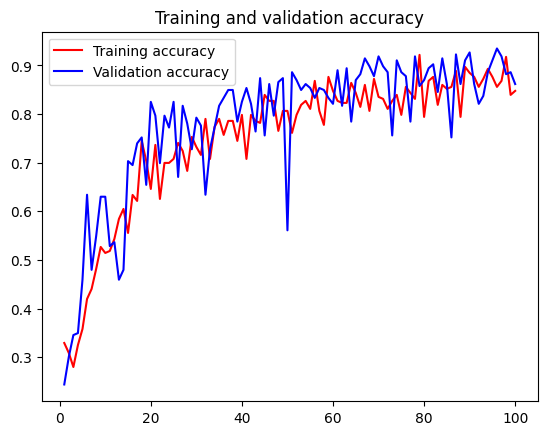

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Adjusted epochs range

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


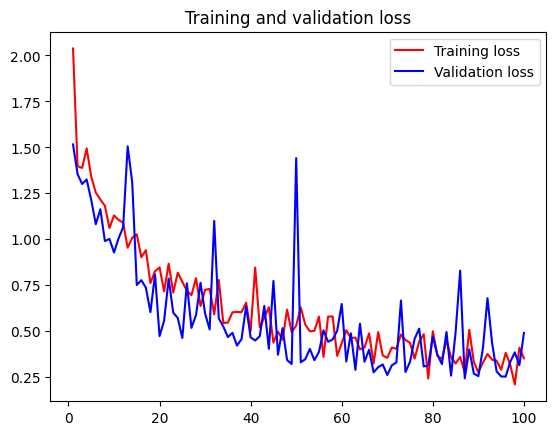

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(loss) + 1)  # Adjusted epochs range

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Model Prediction

In [ ]:
# import numpy as np
# from google.colab import files
# from tensorflow.keras.utils import load_img, img_to_array

# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = load_img(path, target_size=(150, 150))
#   x = img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)

# Testing

In [ ]:
asmat_val = os.listdir('/content/drive/MyDrive/baju_adat_preprocess/validation/asmat')
bali_val = os.listdir('/content/drive/MyDrive/baju_adat_preprocess/validation/bali')
dayak_val = os.listdir('/content/drive/MyDrive/baju_adat_preprocess/validation/dayak')
madura_val = os.listdir('/content/drive/MyDrive/baju_adat_preprocess/validation/madura')

label_indices = list(validation_generator.class_indices.keys())

In [ ]:
def generate_prediction(nama_suku, validation_file):
    prediction_class = []
    prediction_label = []

    for files in validation_file:
      path_img_val = os.path.join('/content/drive/MyDrive/baju_adat_preprocess/validation/{}'.format(nama_suku), files)

      img = load_img(path_img_val, target_size=(150, 150))
      x = img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])

      predict_class = np.argmax(model.predict(images, verbose=0))
      prediction_class.append(predict_class)

      predict_label = label_indices[predict_class]
      prediction_label.append(predict_label)

    return prediction_class, prediction_label

In [ ]:
def visualize_prediction(nama_suku, validation_file, prediction_label):

  path_img_val = []
  for files in validation_file:
    path_img_val.append(os.path.join('/content/drive/MyDrive/baju_adat_preprocess/validation/{}'.format(nama_suku), files))

  # create the figure
  fig, axs = plt.subplots(nrows=math.ceil(len(validation_file)/5), ncols=5, figsize=(40, 40))

  # flatten the axis into a 1-d array to make it easier to access each axes
  axs = axs.flatten()

  # iterate through and enumerate the files, use i to index the axes
  for i, file in enumerate(path_img_val):

      # read the image in
      pic = plt.imread(file)

      # add the image to the axes
      axs[i].imshow(pic)

      # add an axes title; .stem is a pathlib method to get the filename
      # axs[i].set(title=file.stem)
      axs[i].set(title='Predict:{}'.format(prediction_label[i]))

  # add a figure title
  fig.suptitle('Predict on \"{}\" Validation Images'.format(nama_suku), fontsize=18)
  plt.tight_layout()

In [ ]:
asmat_val_predclass, asmat_val_predlabel  = generate_prediction('asmat', asmat_val)
# visualize_prediction('asmat', asmat_val, asmat_val_predlabel)

In [ ]:
bali_val_predclass, bali_val_predlabel = generate_prediction('bali', bali_val)
# visualize_prediction('bali', bali_val, bali_val_predlabel)

In [ ]:
dayak_val_predclass, dayak_val_predlabel = generate_prediction('dayak', dayak_val)
# visualize_prediction('dayak', dayak_val, dayak_val_predlabel)

In [ ]:
madura_val_predclass, madura_val_predlabel = generate_prediction('madura', madura_val)
# visualize_prediction('madura', madura_val, madura_val_predlabel)

In [ ]:
y_pred = (
          asmat_val_predclass
          + bali_val_predclass
          + dayak_val_predclass
          + madura_val_predclass
          )
# y_true = validation_generator.labels
# y_true = [0]*len(asmat_val_predclass) + [1]*len(madura_val_predclass)
y_true = [0]*len(asmat_val_predclass) + [1]*len(bali_val_predclass) + [2]*len(dayak_val_predclass) + [3]*len(madura_val_predclass)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        62
           1       0.87      0.76      0.81        62
           2       0.76      0.95      0.84        62
           3       0.98      0.84      0.90        62

    accuracy                           0.85       248
   macro avg       0.87      0.85      0.86       248
weighted avg       0.87      0.85      0.86       248



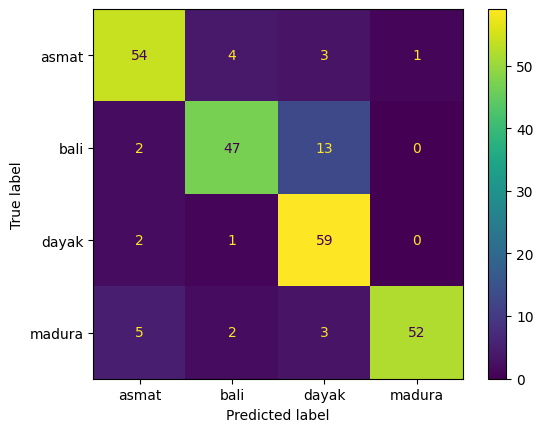

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_indices)
disp.plot()

plt.show()